<a href="https://colab.research.google.com/github/mofuoku417/Multivariate-Time-Series-Forecasting-of-Crude-Palm-Oil-Price-Using-Machine-Learning-Techniques/blob/main/Crude_PalmOil_Price_Prediction_using_MLP_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective
The objective of this python notebook is to use MLP regression to predict monthly crude palm oil prices.



#### Data
The dataset is available at the following links:https://www.indexmundi.com/commodities/?commodity=palm-oil&months=300.

#### Mount Google Drive to Google Colab Notebook

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Use pip to install required packages: sklearn

In [ ]:
!pip install sklearn

#### Import the required libraries

In [2]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#### Load the dataset using the following code:

In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/Univariate Crude Palm Oil Price Prediction/Data/crude_palmoil_price.csv",usecols=[1])

In [4]:
data.head()

,cpo_pri
0,281
1,272
2,279
3,291
4,284


Text(0, 0.5, 'cpo_pri')

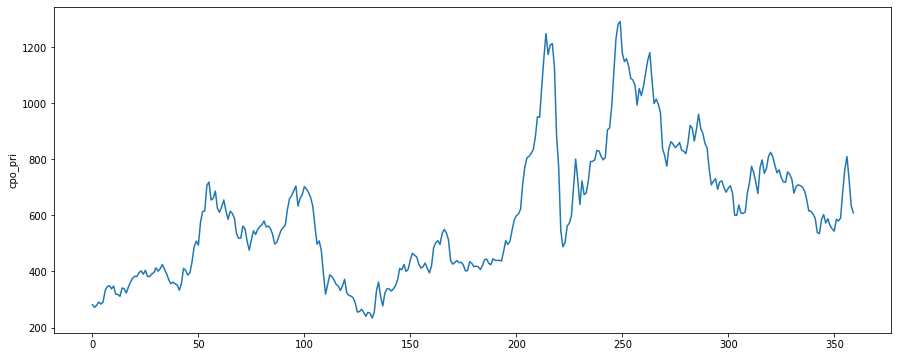

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(data)
plt.ylabel('cpo_pri')

#### Split the dataset into test and train sets.

In [19]:
train_size = int(data.shape[0] * 0.70)
train_df, test_df = data.iloc[:train_size, :], data.iloc[train_size:, :]

In [9]:
train = data.iloc[:len(data)-36]
test = data.iloc[len(data)-36:] # set one year(36 months) for testing
train_data_ts_log = np.log10(train['cpo_pri'])

#### Convert an array of values into a dataset matrix

In [20]:
def create_data(data, look_back=1):
    m = len(data)
    X = []
    y = []
    for i in range(look_back, m):
        X.append(data[i - look_back: i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [21]:
look_back = 3
X_train, y_train = create_data(train_df.values, look_back=look_back)
X_test, y_test = create_data(test_df.values, look_back=look_back)

#### Build and train the model on our train dataset:

In [22]:
from keras.models import Sequential
from keras.layers import Dense

#### Set the hyper-parameters needed to build the model

In [23]:
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1))

#### Build the model and build, compile, and train the model:

In [28]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
124/124 - 0s - loss: 1649.3047
Epoch 2/100
124/124 - 0s - loss: 1593.5763
Epoch 3/100
124/124 - 0s - loss: 1565.4202
Epoch 4/100
124/124 - 0s - loss: 1572.9203
Epoch 5/100
124/124 - 0s - loss: 1759.9170
Epoch 6/100
124/124 - 0s - loss: 1698.6460
Epoch 7/100
124/124 - 0s - loss: 1711.3408
Epoch 8/100
124/124 - 0s - loss: 1677.4524
Epoch 9/100
124/124 - 0s - loss: 1565.8094
Epoch 10/100
124/124 - 0s - loss: 1622.0773
Epoch 11/100
124/124 - 0s - loss: 1632.8788
Epoch 12/100
124/124 - 0s - loss: 1621.1200
Epoch 13/100
124/124 - 0s - loss: 1582.6760
Epoch 14/100
124/124 - 0s - loss: 1742.9639
Epoch 15/100
124/124 - 0s - loss: 1735.8441
Epoch 16/100
124/124 - 0s - loss: 1551.7429
Epoch 17/100
124/124 - 0s - loss: 1563.6045
Epoch 18/100
124/124 - 0s - loss: 1556.9320
Epoch 19/100
124/124 - 0s - loss: 1703.3173
Epoch 20/100
124/124 - 0s - loss: 1618.4462
Epoch 21/100
124/124 - 0s - loss: 1561.9009
Epoch 22/100
124/124 - 0s - loss: 1902.8243
Epoch 23/100
124/124 - 0s - loss: 1665.28

#### Evaluate the model and print the Mean Square Error (MSE) and the Root Mean Square Error (RMSE):

In [29]:
score = model.evaluate(X_test, y_test)
print('\nTest mse:', score)
print('Test rmse:', math.sqrt(score))

4/4 [==============================] - 0s 3ms/step - loss: 1558.8857

Test mse: 1558.8857421875
Test rmse: 39.48272713716088


#### Predict the values using the MLP model and plot them, both for test and train datasets:

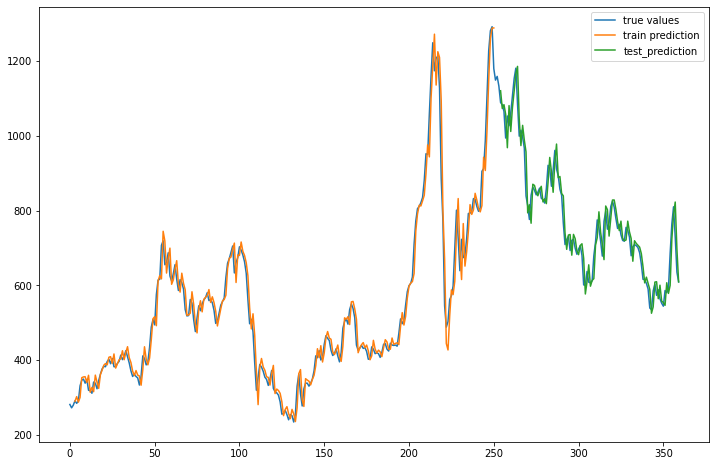

In [30]:
plt.figure(figsize=(12, 8))
train_prediction = model.predict(X_train)
train_stamp = np.arange(look_back, look_back + X_train.shape[0])
test_prediction = model.predict(X_test)
test_stamp = np.arange(2 * look_back + X_train.shape[0], len(data))
plt.plot(data, label='true values')
plt.plot(train_stamp, train_prediction, label='train prediction')
plt.plot(test_stamp, test_prediction, label = 'test_prediction')
plt.legend();